Exercise 3
Prabavathy Rajasekaran (2130757)
Image Sharpening(Edge Detectors) using Laplace and Sobel

In [6]:
import numpy as np
from matplotlib import pyplot as plt

In [7]:
img = plt.imread("images/Bikesgray.jpg")

1.Edge Detector using Laplace

In [8]:
#defining laplacian Kernel
lkernel = np.array([[0, 1, 0], [1, -4, 1],[0, 1, 0]])/9
laplaceImg = np.zeros_like(img, dtype=float)
#Convolution
for x in range(1,img.shape[0]-1):
    for y in range(1,img.shape[1]-1):
        neighbors = np.array([[img[x-1,y-1],img[x,y-1],img[x+1,y-1]],
                                                  [img[x-1,y],img[x,y],img[x+1,y]],
                                                  [img[x-1,y+1],img[x,y+1],img[x+1,y+1]]])

        tmp_conv = np.sum(lkernel * neighbors)
        laplaceImg[x,y] = tmp_conv
sharpImage = img - laplaceImg

2.Edge Detector using Gradient(soblev operator)

In [9]:
#defining sobel Kernel gx
kernelx = np.array([[-1, 0, 1], [-2, 0, 2],[-1, 0, 1]])
#defining sobel Kernel gy
kernely = np.array([[-1, -2, -1], [0, 0, 0],[1, 2, 1]])
sob_X = np.zeros_like(img, dtype=float)
sob_Y = np.zeros_like(img, dtype=float)
sobelFilImage = np.zeros_like(img, dtype=float)
#Convolution 
for x in range(1,img.shape[0]-1):
    for y in range(1,img.shape[1]-1):
        neighbors = np.array([[img[x-1,y-1],img[x,y-1],img[x+1,y-1]],
                                                  [img[x-1,y],img[x,y],img[x+1,y]],
                                                  [img[x-1,y+1],img[x,y+1],img[x+1,y+1]]])
        gx= np.sum(kernelx * neighbors) # gradient x
        gy= np.sum(kernely * neighbors) # gradient y
        sob_X[x,y] = gx
        sob_Y[x,y] = gy
sobelFilImage = np.sqrt(np.power(sob_X, 2) + np.power(sob_Y, 2))

Displaying the resultant images

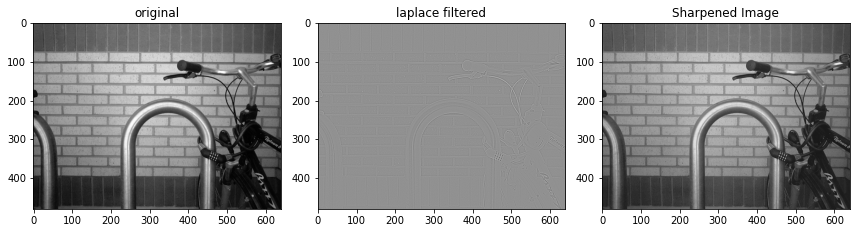

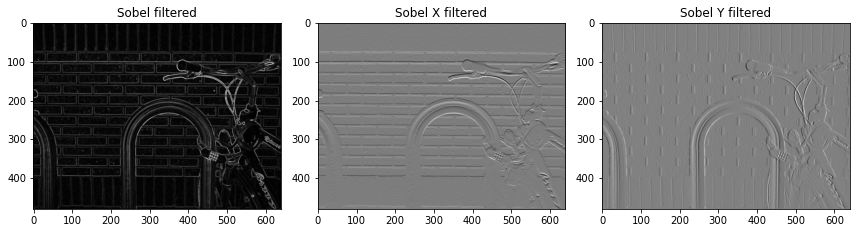

In [10]:
plt.figure(figsize=(12,4))
plt.subplot(131)
plt.title("original")
plt.imshow(img,cmap='gray')
plt.subplot(132)
plt.title("laplace filtered")
plt.imshow(laplaceImg,cmap='gray')
plt.subplot(133)
plt.title("Sharpened Image")
plt.imshow(sharpImage,cmap='gray')
plt.tight_layout()
plt.show()

plt.figure(figsize=(12,4))
plt.subplot(131)
plt.title("Sobel filtered")
plt.imshow(sobelFilImage,cmap='gray')

plt.subplot(132)
plt.title("Sobel X filtered")
plt.imshow(sob_X,cmap='gray')

plt.subplot(133)
plt.title("Sobel Y filtered")
plt.imshow(sob_Y,cmap='gray')

plt.tight_layout()
plt.show()